# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [22]:
import base64
filename = "cv_assignment.jpg"
with open(filename, "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAABAAADoAQAAQAAAAABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDMwAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQABAAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwEEBQAGB//EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/9oADAMBAAIQAxAAAAHTFseXsoHhYhFldtRnRa1imIxgHIZgSEQTHAYg9IrIQJC2TFddsFqdZgqKuplz03Kur63gKOGRAS1QvjipPjCOGScUSdMcnRMEAQg9MEdMAxMixMYBTBmqda5XutRlRq2hCUkR4KOM44KD6eInpO7pQeKABMQRMI6Ogie4gSEWtqVRXai69c23OuNYrMlWLk2UB0uXIRvzL5yN7HzpXV5zux1eSxCIHQgRwoAs9U6rkVRLcU+i0lIrFYk6v0GZ7XnmYmyZiSZGBnKAs05qS48LjHZnKkZwScMLU1cuihQ07kQPhEDgUByxVX0s/CBnfv58hWk9sHjkV7JXkuPSUMaJvc2sH1GuPmA9gV5+Gn22aebI6c3YhPKYjBwlFowUCxYAoSXS1muzZjSr

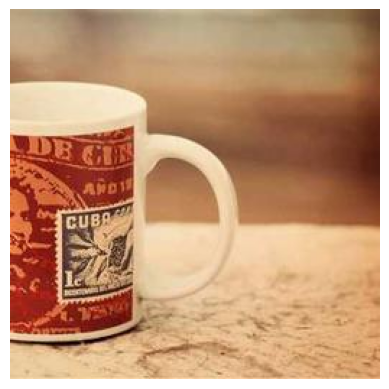

In [23]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

base64_image = "/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAABAAADoAQAAQAAAAABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDMwAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQABAAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwEEBQAGB//EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/9oADAMBAAIQAxAAAAHTFseXsoHhYhFldtRnRa1imIxgHIZgSEQTHAYg9IrIQJC2TFddsFqdZgqKuplz03Kur63gKOGRAS1QvjipPjCOGScUSdMcnRMEAQg9MEdMAxMixMYBTBmqda5XutRlRq2hCUkR4KOM44KD6eInpO7pQeKABMQRMI6Ogie4gSEWtqVRXai69c23OuNYrMlWLk2UB0uXIRvzL5yN7HzpXV5zux1eSxCIHQgRwoAs9U6rkVRLcU+i0lIrFYk6v0GZ7XnmYmyZiSZGBnKAs05qS48LjHZnKkZwScMLU1cuihQ07kQPhEDgUByxVX0s/CBnfv58hWk9sHjkV7JXkuPSUMaJvc2sH1GuPmA9gV5+Gn22aebI6c3YhPKYjBwlFowUCxYAoSXS1muzZjSref3LrzU1nYzktrQz38jqraqbHqPJeq15jr0cVz9bZ8RdPW4GnaufAx6DFdEw6BcHyiJioLaAlbV0hbA1N91Nfn9tsnokyh2szpFTeNMteog0fQYmw82KNjoRzoJ9N5fUudPy3rMJMzm9Np5vCQsitZdpdU03FVRXbVqenxtPI4ey9Yyps0k2R1yy17MaziXLcXN3Vq3M88vi7GwhggMiD0eXpUN8sbmRnqvjEGCFRS5Qpbhqsq2vTfzLCePqxmpf2z6SE0teHRZi70PYvO570rlHW1jPLTmzKHWiXJHYhUoswmTG301idt8Yq94I88n00L5hfqQXy6vWBL5ypX6+s0CvU9LSt1engt3KFvCfOaVfT0Ot5r0eY/h4nhgnokWSnrPRBPBMEPRLwFEoRMKAGOb5jMbG/bWiwvWfQVL1jfgpWE2cVeXsKG7WHuMtkDSBZIvprKyQnOjJZnKhUr5rmNgYCXC5SWKprzqlDv3MVE2ekoX86+I2LQWadXnXZ3fN684bRZZ3nfBbFkkjD4VMsySwoGZSitK2BUAM8coAaJryXXY37EXCpyWMx3axZrV33Kla9y862vk25x0JF2cuMSFGyVmFMhcsoLbXDDlPTKyCgVPHLyyBawbSOnLKHYpW5/WWJSVtXDy9rciWq6xVzTmlC3RoEaS1LS6eVZWyizCQMipjARJLFXCIQxZAunPRvjxCAwZ5RKYOCClHM1VAlWsrMyKLJogC3lpmwVmalgELPRVYUKExECt8L//EACoQAAICAgEDAwQCAwEAAAAAAAABAhEDEgQQFCEFEyAiMDEyI0EkM0AV/9oACAEBAAEFAur6MtikzdmzNmbM2NjY2NjY2Njc2L6P4sfyYxoooS619iiiiiiiijUkiSGvtr/jZIZf2V/ysZsbF/NfcsvrfwbGxliZfS/+ljGLgwOzxHa4jtsR2mI7PEdnA7MfFmPHOPSyyyyyy+tlll/JjH9uWKEzNhePpZZZZZZZZZsbG5ubm5uOQ2X9zkSXs9LLLLLLLLL6WX0ssbGWalFfG0bnuFsz/wCuyyyy/i+llllllljZZ7uNmyL6WbxQ+RhR3eEnz8cY5PUJVxc2XLyc0XLH7GYePIiyyyy/t2Ppy41Pi/7W/wCecFDLkhHGZHKElrM1iapCVvibdyusoxkZOBimZuNlwFllll/Jj6Po5TZjWs3P655vcnOUmZv9uH6MT2k8r/x4XfDd8g2HyIxI54yFK+nK4P2n1fTySx4pEsWSA8szZH0SMctBqRJyePajgavk2crLUaKMfIyYzDmWSJzePq6KNTUoor4MfRcmG0YrJGMckMs8ccylBwl/Yo22qEcCDjyMstYMoooxyeOUJKcZraEoayoooooo1GhoaGih4J4xZZ3u6y+BOGSGTE4PjpJaL3Eltslk4U9+Tn/WjUorpxJ+WcmNT+NdGMaGiunKjUsGRPHaHGMh7TMkaPqZq2R4WXXhwwRzZ/1+ON6zOSvHzfVlEcm+PLn92OPCp45cWVz4vH45fFxyllxJTc8cMz5UYdvcuNj0nn/T5R8wz/pXWiujXWiiumXjr205GJyU+ZXu8pZteTUY5Kyw0tkZ/wA84bw7Y7Y7Y7Y7Y7ZkVUJx3h28jt5HbSO1kdqztZD48z2JnsTPYmexMeGZtkkp5ZLjRk4OOae3qf6w40pxxx2OGv8AGt1Pn4onH/EfjfR/iH2vB4KRkwvRPFFN8Y+jf1LwscuTVZc0oynhed/x+JEMn+RH5y/Efx9p9PfyI9nYnjcGl9Xqf648ubHj7nKzR8gy0sONW+E/czR+b8y+7FRzqUXCQvzzobxm8nEWCEomR+1x54omikcRwiLrfRIk6USy+uxsiy+tmxtYtscvqzZMigR8S5n1nIjfKxZ4ubeL35SjM9xRONnjkmvi5UflldX4NWKBXWyyxMlnlMWTWc3vMzrG4PsERycU3zTl7XJt9vE4uZzyY8iZaLR7iN2xRPA+jYn48Hn4ykk7Y/ik5P3448PfSO85KMmfksqUnVLhL+aEIwSaYqI69JXVyHsJDNl0tkpsUrNi/C8r8H5JwfWOKUy44BSWXG1KJGSeFZKjLJbc2z0793OOymx72rSt1LILZ9HSW9CkmSk0rchKSXuVL8qj8vo5IknjexKWUeGTftCxbGruPFzzI+mZWdnxuOT51mBNryJ0bWIR5LY4KSUaWTG1JXUVRKzXzRRr5pI/vwP1HGd/wjvfTx8z05ne+nI/9PhRc/VIRO95eVac7IY/TsZ7MYloUVdFURakbQR7sUWmeCUCKlHpqmeUf11bo/JoapjwwZ7UGZOBhyEfT8cTtsWNRg7srY2d+TI4oWWQ55jTPMhgFiHEv6oSmKy6G0zWizwNRKHZsWNu/lfwbPKmtempVH9/06NIk0RnSTUhsa2NaLSNbL8kvpEtulOxNnnq1ZVCTKJR8NO0Ux7FeKEnWvRq1o4uLkzyeSnfko1sqVeT/8QAJBEAAgEDBAICAwAAAAAAAAAAAAERAxASAiAwMRMhMmFAQVH/2gAIAQMBAT8B2xzxeCCCCNkEWjkVpPZLJZkxap2QQQQQJboEuPwI8H2eD7PChUtJV7MmZk8tb2zEek6FyVPlfUjTui7q6TyodUmXsXfAx9iszJmTMnbJmTMmZMyJs0PsQ+WR9is7TxSh0nIqTFRX7Ki9kcSJGZQOojU5c8nv+nsj83//xAAiEQADAAAGAwADAAAAAAAAAAAAARECEiAhMFEQMUAyQWH/2gAIAQIBAT8B+W+KXmvLDKNTiWmjfHdqLEJl8IhCE15hLokF7EuSdG5hfZmMxuUuqlKYE6PCqLCRk0vWqQS2MRKIyoymXxCaKJdiF+I/6Yeb9D97i8zjTKXkp79iiMqNhrjpUXCZl0PE/s//xAA3EAABAwIDBQYFAwMFAAAAAAABAAIRITEDEBIiMkFRYQQTIDBxkSNAQlKBM1CCcpKhJGNworH/2gAIAQEABj8C/wCQN9y4qx91Y+6sfdcVvFUeqQVVp/YahTdv7A4fsDvld9vurhXyut9vuv1W+6O1MXUwStnSHcim63GE4BfpuVWO9vkw7mvwmN4EFNP0upCG28SVpdDx1Cpg+xR2XiLqodHNSMOerimEkWPg2gCtnYKkiW8x8hDyP5BFwaHHoUHljxHRM4NBXw6ooG8lPj8r1CdFDRM4QM6uHut4Zl+CPVvnuLgIjgh9JKnDcSOiIJ9Vu+y3nD1UAtcnaY2uq0QLX1LfAnkhANrnLQ2/HPmFIy7xtjfzjsmql7L+6mmjkrQeah2fDNs8ijF/DIQIRBRHLzdbKwu8cd36U2GzK1afyoJnhW66LU6OixNQpCxNIHRYnIhNHJpR8WjKfODuaAtFFcLUCJQI32mnVB7d0/4yoJ9FLtj+pQx+t8eMHzy/SQo0wpmpMBbJDl8R7wXDgtcY3ssT/TPI+oHgtY7JhNHupGIyZgtwxZfE1PMfUblWpEeQPTzyQTzVCUN+JrC7LynisTU7Y10Cx3lwh+mIKIbpdOmw/wDUZaAJlUQZ0lR4Lq6ugER4b52VlZWVlLIn7StRG0aKWmCmziECbrBrN6qQ6vBPY4bSYYR1UA5cVSXdQg47zhJ+Wdp2nHmgx4J+r0K3XBN7qZm7lgTBuhoAcEBi9k/lMIjFoz7kTQtg2VBVDDHBtflt8oHvAZQBuhSVgUjog0YdOaDQB3nqnd6dltNld3h0aXcaym6jRu0sTF+4/LFpaGuHJaTn2Zo2Z+5d1TWbQu8eNr6QmYQmXmITe8BdHLgUWYTdJN9SGG0zpufInzpsUK1KhsyP8oFdk0y+t+aLjwZs1unTAi1UMQuBIChv5RkzxlygcBwt454eeNUUQe0QeKlUXZu+cNOk1Bhfd+StnALj0agcPspEc6KX4rMKeS1EuxnTxTrBobRoV/BQKT4LeTbxQEwYrGu0oRhs9k0aY4eq2nAIy6t1Kf6InKqpnYZVyjOxVjlKtnTOgQltYTi6NQsECUNbqoHvK8lPSJyeei0cVACiisq0VCqnK65qVaVsuVSozgOUTXK6q1gPotOka7SEAzTFqKrhzW+1b7T6KIKphOW0WtWrFfP9S0dnZTnCnTtdUJvnfKhVTCqcpbUeqo78HK0rc/7ZXV/B8TAxB6tlVbEf7a+kfwVdH9qoGf2LZHsxbODiGei+F2Q+rlt4vd9GhS+Xu6lQGgDpnZSrK6vnIMKKq5yv7quV/BdWW6FVo9lugeiqxp/C/SHsgdP+FbKNBjnltArYYT6qghVxFtFUM5ENJ9lWIyrlRVWytpUcuatGUeO3gogXKy5KuULnlSmVfBZXUwFGW7K1SRnZWKsrZ0nOoVjCtlY5UW0B+Mt1bqlsqrVbLdVlVpVJGW6v/8QAJxABAAICAQQCAgIDAQAAAAAAAQARITFBEFFhcSCBkbGhwTDR4fD/2gAIAQEAAT8hqUzMtG5eUdEQJECApeDloqWl+sy3irLR+WvWiJBBMkIOgCBCKgSpUqJElPgqRPTWI+ajGMSBKgQSoHQ+L8mVGMOOgQi+ixj0IdBCXLl9LjGPxvoxYsYekk6K38A+DMzLZfS5cWXF6i5l9Fxj1Nw6EEWMXCEqH+FOqSpUqVKjGGHoDtIB3/cD6jCPR+48Ax/7CD2+yfrxL/wALixinWuXmXLjHH13L+dzV99yY0+SX8Qegyy/ClS8tFdTeo+J8OYMS5fxBhll6F9S+h6BRi/cl/EFKetk8kQRXBFoqTx8YpMMY9S10WluhUYegYNT8SC6b0zDh+ZfmV7PzHeD2IhTHonijUo+1ohwGtnJL6FHGjUOC1IIWfgmjUKHNnwbNxYsYyokeix6CytDB/kiSvCo4zN4TJ5W1tMthgljcB4BZB0CXLV7osal5e3QdopCkqDRR4ihBmHE8kKu/g1P1CKD+MX1WPUYowxRDOiNRQxwwb2FMWIWBms8ytCMbvFM7nn8RFJyJYm1l4Yj5LozOF0KC2rLjxUGNItQ3zGuT0weUwmckKv/ACHEzM/Jj0MYosfEQ3tZmfYBhn2dbM2DvkS5FJ71M1rPC4joi3V1mIWCb44gFnpASV5kNsfJBk8TSZKy2ODt1HAXxMsz7O0uFT9h2Y/HKoqJEidG8YGkjkcxCQdFiirW0xiX2wapUpx9kxprz05oe2XEdkFuMxeoXg+orPQzJty/Aj/vO5NJTB15iI8q+LvTfiQGWrCyytzGlFWVXGwRG94PbFcqE2nj+5gMLhqZtd8PUS7jVpSIXDLNdKOyOR0wxDAHkMHxiqUNO8nRQU38KlRhIIOoMJRiCYaZicR6Fj/3IwUk/PhlCkKy7NwKCuHu5Js35tlZ0N7RiM7bVLkgVpoh6npU8HsdS4vmV8LixehiQRg8IOO8QKAPeMlS49p6CHimEhhvSzzBEZ6BxCcD6poh6UU5bF+JSgAqKkuoIUBzzidjxFwAJPdhweqfBWoN9KpXUToJEjDDDjBiZiBZP3DNfUnKz5bNoJ+BkmMWJbdeJeywljidnxdw7u026LE245gHC/OiBVbRqfdIJ2yvdj2MvF+jeDCOJvr9s8sxw9yE8xrh6ZMYJWsZs9eR7TEVoX/Mts7hKcSyHHmIVEH7NTB/tbNylTgurpuBeypz9zh6ahYB2YcX2hxHzVMUZEr4sqURCV2RIX4hts33wPDWkHv8SNOMOxEos7Vp1AVN0GZQEvAuPuGAZXxzzNd8sW6Ig4OFrd8YYCVze3+C6jE9bl9WKzMqCUynQlQA5EQ3c2Ajh/cWrk13nZNvTBL4WThcMpiiuDLNTU0zzntGkF7L0F/W5e23Uzj/AG4lg3kD0Ry5fS5fTXh0uMuXF6PRYsucvJzxHQUjLRvnzGbj5qXP2BbWDcXrEHbBnKidm9t92GEWM7rmCveFzsT/AFGyArTqj1CMfOBpfD0jL6V7ROYMsC23py6MctwbmJ6LzFjDQitZiF+qpgGy7gKC1Suoog4KXv8AUDkWWKZ0zBvzpFL3q4X28C25lp5AzmJ0rTdDv3+pRRBKSYpe1GHiMh0oh4hG4rZHwl34h5w30cKEqzFLNEuVuMtrlMRYtpiUJcLhl9SvEpEYqQZFBdHaUG07Mk+hi/EbTZY+Kv7mQC23Wp4bS9Gu0Kq4YAzDcCyEqOYjyR/t0yW2xYF6i1KTEG7TNiWw4hfMb9ETuxTvKEFz6EwMEsOKmLj0A7ntHShdfqF5M5wHLxEuarJNu8TeJKIt0S2mYBoqEGMvoytzkkneS7hG415dCGwhH3kzSUtQiFXUoNQlfwShBp3jpX6hyNI4ZuX9IhtRl3VT8UQ9JyNw1XZ4CoLiWWNymRou8yxF+SW1MsAFXLNNqLjsSqBruywD7cQ6xe0xEseSnYR2qAbjyKTB2+I9SWIonZj2ZtGx5CuYVLWjB5gCWE3LRtaNYgbig0vnSUpynsfUqKPJ3Rdk1ksWF+UzLVDKuLUETGCcRe6VNXv5YCyp3UfiEc44rQJX1+4V/MxFW3Zh+TMFVTKhFG6o+og0fco/rSgokGu7JQS3iC7InY1HsLMH/CC4oKn9XK6tK8uqqVMEq7WxOATW9MQ3F60vSBGNl7GfxGrSarafhrEZT7YOGBWIC444DpInxB/8GDTzu6YvhJALuoy36lnD6UxWK3wxRs4c5i7IGNOg33hxsd6xC2m4ilt+5zgGsysXR7ncMosWhtpT6mMVL5Iq4RzRBri5blxxEvubD8cR1Evc3uCfRTYuUaq8YTGCjiMClkTsUe4Xyn4JXIfzNdvRcygrvhF49+JEZ8VKbsJSXe8zS0SxcBw4MwfaqJZsr9zZT8EB3AtVV8RFlHXEt7Cs/wB9Dm1PG4uQekrkV7QDMHrUGJDs9EuV9+5uD9un6mnWPErMLeCN2FjZGzNGULVvpKvL6hRWzzFCkpgUDIlBWPUUMLeI3DqHT9J4WZPHrUTNx2iLbj2ljF/DMWxNwAf4mdIRGVvRgqiIembOa7VG47C+p9kL5RK8ROEeIGD8/UydI+ofM7YiyHcYnDL8TtWTNsP1Ktaalw3HsmInaQvi4lOVfkm5R9TeHxUwrFcxti32RKar6jcVewhnX8iUvY9RYv8AEhsZfUtFWH1P/9oADAMBAAIAAwAAABBJNmYSvELOI1cqGvUhga1Tuq+92MegspjQx1i8Aguftc+K7XE0YWDo1rrKI5HGtlXYnkVduHnkxWGE0G/kwA+ugIGoT4I0OClTuLyFHl6/Rs7vtLDAPRUKHN8iIGl4/r9ysi46QaMeXOfJbvUR0b1r/GzTpZodU3Wn/pdhcC3lDRkhCx0RnGT1k4Ot6ebnFW1IaPOjMnALIaPRSighDyP/AGfDyjChTpHtngv3ujGSZ2BsFsrRjLU5q/BPnLIdzRnv/8QAHhEAAwADAQEBAQEAAAAAAAAAAAERECExIFFBYXH/2gAIAQMBAT8QIhIhB5IgsJlFiEIQYhMlFFEZGJMWCYzMIQhMTCCVKZfo/pmkaERERejoRrMIyjYr4uKUpSm7THuI/RDrEFpELVTEvoXwUTL51T/SocZYOKpYN8DVX08Nay19F0OY0UbeUREGHws2cBu0PfENkN5aq9EIPY2mON3BtJD/ALiWITm80sUmFjqcxRdGzHvpPCykISEoqNlw7mg0jgTgvgWxLE8JDSi/g2fg6zQ11inVFcCQ54WJhcKkTGhsOfRJ3DIyPK8IR/hSab9H9MUQtkIaGiQgllZWU5mzwsVCP//EAB8RAAMBAAIDAQEBAAAAAAAAAAABERAhMSBBUWEwcf/aAAgBAgEBPxAonjy7R+KaKUTKN4q0pUVDZSieUpRlngbKUpcREQiIGg3VfhzkE4ylLjgITIIhCEEmKzSVPgv6dMNNEs5FiFwglhM1KVDJBcKZ0UpSlxCJZTr9KuBw2oJn6L7FYTG+CsrEyvQigoWG5gz0KBSXLHIVb0KUuIsFV8Mf4IK2xElUyugi6GEEDXreEKUNXcRJdiC4ESXA1GVl8GMePsXD/BRqoT4J9DgzPfOutdOcbxL0JRQWz7SG4+yjdG/C49V9glORewXqiHLKUvi9j4L4n+hAMdcDbyZduXwZf4tZM//EACYQAQACAgIBBQACAwEAAAAAAAEAESExQVFhEHGBkaGxwdHh8PH/2gAIAQEAAT8QVWGIcxy3EeY6ZYK7i27qG5Z2Y/Cy9udqHrMt5uWfSqRvwx5Iolup7sWNgTJqN6lPUTERmkW/SoiEeIh8zxSw1LdJV6HJBr1QnL6HDUrBuD1GCeog4lK1FuJ1ojqPMTqwQhg1GBxOJUIbGHEutXMkzwxjTDDX1tvR1E9VR16VcRII5QJNJdAwlemPcq8xSoZzHd5hVuJ3ADBcFQVPdKQFyksiCKy4sxHoozEUI3YUxVLuIEzGFUIMfF4iPcyNPqFLjTMkDEsyn0CIXZIKKy0aZzEuKuKRjyfRb+htFHmVDNhL7lUMwyniC21U8sq8zaCAxBUNehr0PMqV4iZgXEpiECI9NZSYOocagxqYcxcwpcM+oAm/W8z/AJBQY/uRXi+UVMQ/yeRlWYGnbrBi2MdiyY3fEC8wNbgblYDuV7jlG7LLzAMXKncRe4F5lImHnGGVuCwrYrYLDOoCDevQySoZgtVc0SGOk6klfcGjRHzMZch6/wAsWO4ucxO5XL9QZxFesH0kqNwcznljBqJqCQZcu4g9CWGWIdk4/caXccfReWlyZfQsJQxuel6ynMese3o4Zlt9GjTSnn7Qf/sqdfsB5o+Y0ckOwiW40RcRiSGWZGunFvMTUrAzyRoxD5JjzFQuJYqivMQ5nklzNxXMXuOcxaidxilpsqT4uWvxiymSEJ5HyxG7D4T3qML+5lIvFGNqTFh2nvCBQClC3rEyRcsM071fvKam+NHDEslLQS/kRxvecoQTpKmsPIh5ZlnMcYswTNgvUzlJNcRuoxLLsjnBDEcBf+OJWHLntSP5+xoKMurMj+R1ltTBuRgOQSke6Mr/AMVK0TszLIIM2Ff1Ex6XB3BZC0LKArHccuHyKrslQ0ZVW39xF1axgBBICpxkNjpPN39WWmR4y/LqfYgme+Vj0iNyyXUwJADFiIZ4zBFTAzsZj5wY3iZqeUMEyV3HP/JYX5ic5n3aJf5xHSgpWB0Z/wCIMw23hbtyQDO2A3XP0F1El6tDlfFn9RLsZY6azL3QKg9GfvcLSyldKxqVFjicS1nH2qCKg34WaKG0AQpHIkRVKtPT5/wiApMyxPmCzmcy4rY4lGazlGGJcx3dSatrjpizdMGGU5O4ai65WnitMXcXlA2a4w8Q58FU+m5h6Ps8+7E/iDKvFtKbFweY8GqQ1Lupbig0NHiOd6LhUUF6IKMeduOnEMh1FuO9meh5YrggxEsTSRkI8uT2YKs8JhXUxRlUo+Ix2fM8ERHLQS0wna9Jhj1qN1BXEHoEBscygoxKkaWMg0rw+0XXfJQHCitn7EHM1ZXadPmHnguNKeI5MssYX+Q14lEF8vEG4w4yXWfrxHajQWwsJemVg26TB/SujzAtYmVeWez0/COXdY4OiMBY2MKsQ1CWyke2UjT04O4l4ngi9Txx54/QNYjuYO+mKAQoWFvjxKpgDAwX+kDAAMVbij6ncAqd0NgHz5lWAytdvs77lqUPmXecfMRz2FKAzftkjKWXNUefiAFQw1uig+ZspByNFzBe38zOMKN6jT0Ngqx3zyTD5lC6afc9aIzVJRr0MUtuKk88YgACg0BVSoXip2f6igprsUXZfvE4e7WE0uBEo/wTVxatKFzj/EvJa+Y/wOoG26AwcbLtg4bgaDvHEC+F4A1tzg495g/S+PF514lDe0lMqDEQ6zHHzEC2N+3MzvxLx4P6TaMdy30DWoXUWYYVsw+mogFbdDZ4lSFW8nUPE1SaQW37zYcICiXj9hLUVrqqtm7eGNPUsGBSC5blQOpg3hri37iJnwrsBo61AwkuZQGus+JmCRcAkM8v5gJRarIFq+7mfNKnxMOiWESVE5HiWtyH8JcY/wCuKviMsv6jGGIFxc36p4IcNMAOKojRzDIl74XxD47sG/wRYcOEqF6PMBqSaFSNL5iksKSWA30Bm+cMa9xEJhxCioQkF2OhBohhAdAKAvy/qBuoDhFDNTrHzqIhaaJHLUJ/4Ux5Z/wI14/EbYRdtI/JvL1TPYnmIbyEsxSe+Q7QZa0EcAuU7pFVK/cGaPtNwviVGbUq9sDdhL7JSGdegWynxxCoAIJWIoa1OWLzQ2kBQFFwqi++4zSIqmzzjG/MB4YoCBwVyXX2TqKnLYz5xKmvEOFeEtwd9yocAGgGMopTArVtpgvoMREs9EEhviIGqlHMoTBYvc9hKA1BOpjqLjROlESuQ+o9ZOrG7S4g0TYiY7ZVQHdJ31rmLuJFMsUidNV4l6tdXK/YrqQwhRvGK+40QPJa/E1p4ap8XcUP5wV5bWePyDVyQbGgzxvNtciyqyRNKNR+1rnRW5g8BkabySjKfWoLTKo6wA/Zy9vVXUuoltxUP4mPIHzJc3Gj6FxFLzHeoCKo94tWMybgaUFF0wkuGUbuK78xmbsUCns4lgVpEtbGL4vUwJoho30B5qBDcHIpxxgzW5feRXZwFpVVrDmr4lTbUOFwe54Z3uVS51IAmlwta6IRrvWBSm64TX3qOooT6A/1KWjPptFep75U5g231EgdG4iq4MRaiqxHnMIMs+pWpeNTBMEa7jXps7Svn/ERViPPTiWF7W9plGC4bJ4gCFQ6nQFnL/MHtKCWZrPnEqspVb5gdleLYQchC2m6eW+eHxLLMEwINGWgH67ipBENNVrgXT+Qqyx6wB4H2mBcsCo0jTEs5XHtrEaZzCpEbaYVVcMG4h5glcKZQFbnYmXMzpOElbphO8QSwxkqhYqSf3AS1BYuviB2UoYDFnzBVFkhgXmjt5+IAX6pYCzT23K9okZm1KeBPvxDEpg1CxdmFutYmRC5vZQU6oHjmXGhEgOjlp2l2XkC6sE6q6rcZnviZDB7igDqGmGpdxAGh7xqmHumQqFWWGCvUCzxHW94CIWrvbCW1w1WAlSuNhjmN4HMW1rEQ44jhK1GoTbJyvNMUBQmBZ2hwPUFtXzRsNag32znqUglFkwqfLiClYzZK1izHO6YJw9sdgN34bIkfWoCKywdOeIqfRSq1n5oXmCxSyIF2vsXQylACA/stOfMv6EpB1GckHXT7hexmAWuHAgNkec6JpKX7zCgdz4iIpLQovZNZS+LZaY1u5gBWRJrELay1GifiWi96lta+UuOS9hKwI7XLGSsCai+X7l2bh5V5gALDeKVQF5eWamlcpba4/YQDbrb5egnAxQvRqhKcNHN7iM9Wqb2/MqgKScW/wCI85CivlIY5um6idGJhLqby6ubxBnhSlA1qoGwAddwWgC+XiBKJXU2V2XcA0RqUeA+4mjKFJeo/euNr88RJVK6i2sezMUM08mYywoJUWL7CBkeRIlu8e86TGPdiDhBUri6gYoCoUvIuII3L28jHeYKlyNl/pihuLCt/wBRmBVdqXv5mQBeBp34+o+NwOqYM2JLTF33FOR/B6lPg4WD8iMTfXCVQpNGNwI4M/xGw0FrVpGgj9x8wNWb7ufZHBc4OXJqWARukTMbrDaSgKdBqYQ+cgULdhggY21XtKlNo3HCQ7qGJhhIKrDfgigAo6uFqkJRYx3iBK4MUBc2MKdkYgzm6pn2uXVmUhs0t+IGp4aHk5ZmxMFlr2l0TNEdPtMurhRftRK3Gy0vgx+wmAGx+IbjxeQ+IDmJLllbZ7tGqQgI1fcKqkHku4BAw81KxRjvMT2qPG0OtNdGFXI5DD7lqQyNzM0DYRNeVpQ34jlMKQH6lOBTeruU4B8BBy1WZsfxUrM0vwSgV7dyxrlsoZIAUWYGDsAGx1HYtXuYCu80EuHNCv2UQyIeX3Tylbi9g61ATQwqzX1DAx1gY+iUrmDA75gx3blfWP5gY3Yca/R9wdCZXBhS5ZAC3zKRiKovcyZbuhR/uFxAG+RI9avT/cCgoUQ3jiNXTUtlMGWrH8wdF53sUTGA6xqIRK7N0hha1oZPyylWA4RfzFVrV1iczuKagWheb19Qrkoe25dAVe1DK7NvQ4iBY33LAYdKm43FrOqCY9XiM3kL6y2XXCUgVtxlh+oWmEy+wdQ3YUZj8jEkVFIni+CVxMPhhAAGnK/iPJDFUB8XLFfaw9wVDY+o5HZYJv8AyeIPlXDuHtywP4NNlvxLF6MlFVxMiSMDupWNVsSYWblRd5cM3gDkzMCNmLcqWaMA3CjhbLz1MwRu0dZzJbUQXYRjN/zCIi0Bc6IVr3IaH3AAIXtVBDZmMtQwpVdNx5bNKL9aiGFtliKDUQPJCjUHbMsU4Rqlyw0V4GLi2m7rJcaTKew/uZsSB5XcPAU5GoMFmNJfG8ygG+a1A7EO+cytlUKp/IttwbVseo0XwHfvK+oFWuYcYzQ9y2JzWS/DKCqoGxtgq4exuN2HTWIPERpLWg9mDYX9liRsMG/DvNUoFharEohwWiVFNosbIUXvYCfcKqJRbk9+5Z7vaCu2H5JQWJfBL1PuoWti8KZeFhyJqXe/xBqVV3gYuVkeGs+IGrSdliYGM5IeL6vO0+aIQuchT9PULVNGrEcP4nMC2jksgsD9KZeAQYU2lbyvFT3yXGUHbIksDJYUSX2I1TuYWYxRRSzdFZjbY8tfcp1Vdlm57IXa94cBIZyag18hhUyxXgvuaZR5Fwcy3PCf/9k="

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

img_rgb = np.array(img)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

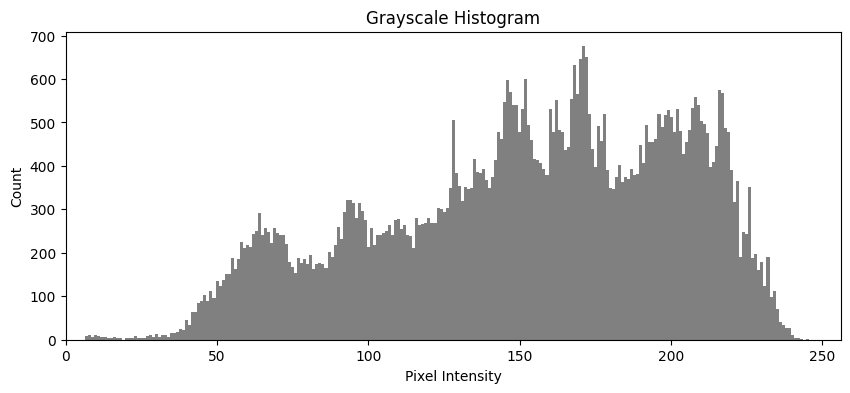

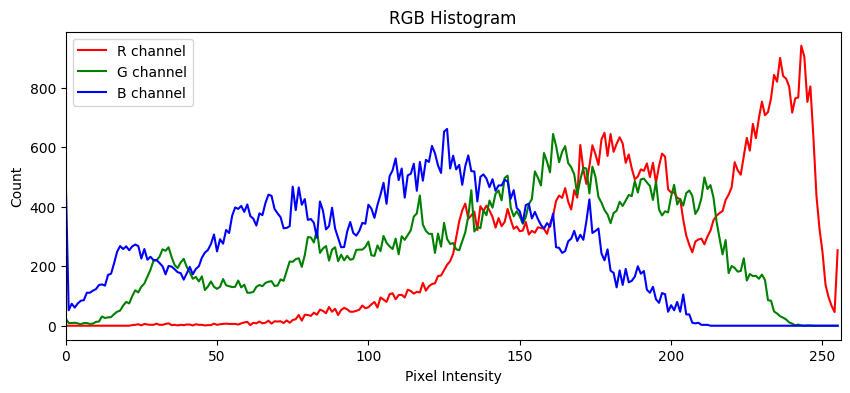

In [24]:
  #A1
def gray_histogram(img_input):
    # Flattening the image(converting 2D image to 1D)
    flat_img = img_input.flatten()

    #counting frequencies
    hist_counts = np.bincount(flat_img, minlength=256)

    return hist_counts

# Preparing gray scale image using cv2
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Using the histogram formula
hist_vals = gray_histogram(gray_img)

# Displaying the histogram
plt.figure(figsize=(10, 4))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.xlim([0, 256])
plt.bar(range(256), hist_vals, color='gray', width=1)
plt.show()

  #A2

# RGB Histogram
# Applying the same function to R, G, and B channels separately
colors = ('r', 'g', 'b')

plt.figure(figsize=(10, 4))
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.xlim([0, 256])

for i, col in enumerate(colors):
    channel = img_rgb[:, :, i]

    # Applying histogram formula
    hist_vals_channel = gray_histogram(channel)

    # Plotting
    plt.plot(hist_vals_channel, color=col, label=f'{col.upper()} channel')

plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

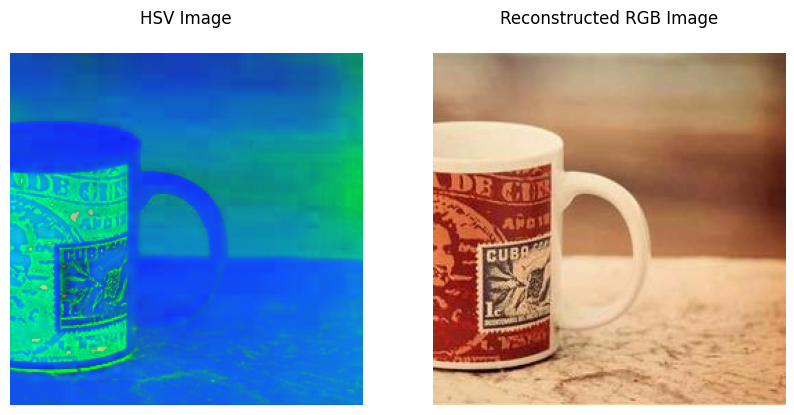

In [25]:
def rgb_to_hsv(img_rgb):
    """
    Converts RGB image to HSV using pure NumPy (Vectorized).
    Input: RGB image (uint8, 0-255)
    Output: HSV image (uint8) -> H[0-179], S[0-255], V[0-255]
    """
    # Normalizing from 0 to 1
    img = img_rgb.astype(np.float32) / 255.0

    # Extracting the R,G,B channels
    r, g, b = img[..., 0], img[..., 1], img[..., 2]

    # Computing max,min and delta
    cmax = np.max(img, axis=2)
    cmin = np.min(img, axis=2)
    delta = cmax - cmin

    # Computing value(V) which is the maximum channel value
    v = cmax

    # Computing saturation(s)
    s = np.where(cmax == 0, 0, delta / (cmax ))

    # Computing hue(h)
    h = np.zeros_like(v)

    # We use np.where to select pixels based on the max channel
    # Formula is different depending on which channel out of red, green or blue is max

    # Red Max
    r_mask = (cmax == r)
    h[r_mask] = ((g[r_mask] - b[r_mask]) / delta[r_mask]) % 6

    # Green Max
    g_mask = (cmax == g)
    h[g_mask] = ((b[g_mask] - r[g_mask]) / delta[g_mask]) + 2

    # Blue Max
    b_mask = (cmax == b)
    h[b_mask] = ((r[b_mask] - g[b_mask]) / delta[b_mask]) + 4

    # Convert Hue to Degrees (0-360)
    h = h * 60

    # Scaling for OpenCV Compatibility (uint8) ( from 0-360 to 0-179 as told in the meet)
    h_u8 = (h / 2).astype(np.uint8)

    # S: Scaling 0-1 to 0-255
    s_u8 = (s * 255).astype(np.uint8)

    # V: Scaling 0-1 to 0-255
    v_u8 = (v * 255).astype(np.uint8)

    # Merging the channels
    return cv2.merge([h_u8, s_u8, v_u8])


# Converting using our function
hsv_manual = rgb_to_hsv(img_rgb)

# Convert back to RGB using cv2 to verify
rgb_reconstructed = cv2.cvtColor(hsv_manual, cv2.COLOR_HSV2RGB)

# Displaying the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(hsv_manual)
plt.title("HSV Image\n")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_reconstructed)
plt.title("Reconstructed RGB Image\n")
plt.axis('off')

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

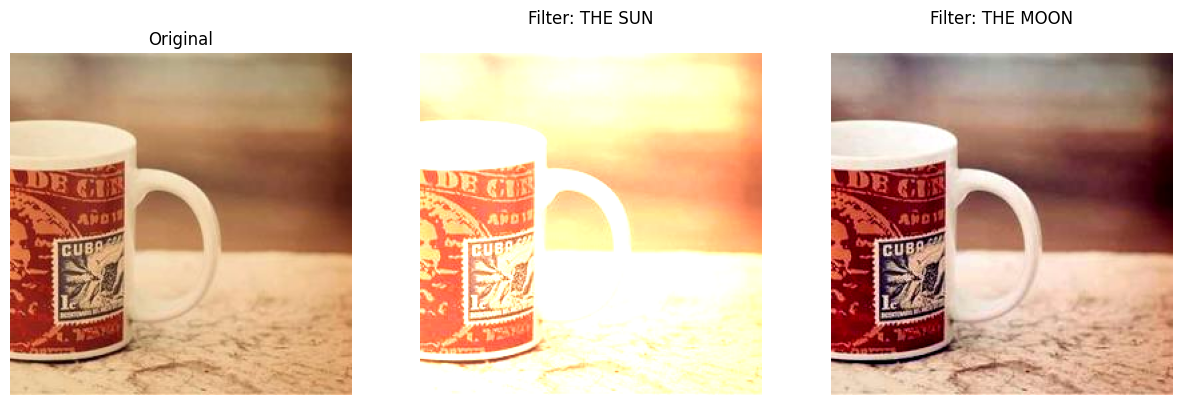

In [26]:
def sun_filter(img_rgb):
    """
    Filter 1: THE SUN
    Increasing the brightness and contrast
    """
    img = img_rgb.astype(np.float32)

    alpha = 1.4  # Higher contrast
    beta = 70    # Higher brightness offset
    img = img * alpha + beta

    # Applying a warm tint by increasing the red and reducing the blue
    img[:, :, 0] += 40  # More Red
    img[:, :, 2] -= 20 # Less Blue

    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

def moon_filter(img_rgb):
    """
    Filter 2: THE MOON
    Decreasing the brightness but increasing the contrast
    """
    img = img_rgb.astype(np.float32)

    alpha = 1.4  # Higher contrast
    beta = 70    # Lower brightness offset
    img = img * alpha - beta

    # Applying a cold tint by increasing the blue and reducing the red
    img[:, :, 0] -= 20 # Less Red
    img[:, :, 2] += 40 # More Blue

    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Applying the filters and displaying the images side by side
sun_img = sun_filter(img_rgb)
moon_img = moon_filter(img_rgb)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sun_img)
plt.title("Filter: THE SUN\n")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(moon_img)
plt.title("Filter: THE MOON\n")
plt.axis('off')

plt.show()

# Design Choices Explanation:
# For 'THE SUN', I pushed the brightness offset (beta) to 70 and contrast to 1.4 to simulate
# overexposure and intense heat.
# For 'THE MOON', I reduced brightness by 70 units and increased contrast again by 1.4
# to create a dull moon like colder image.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

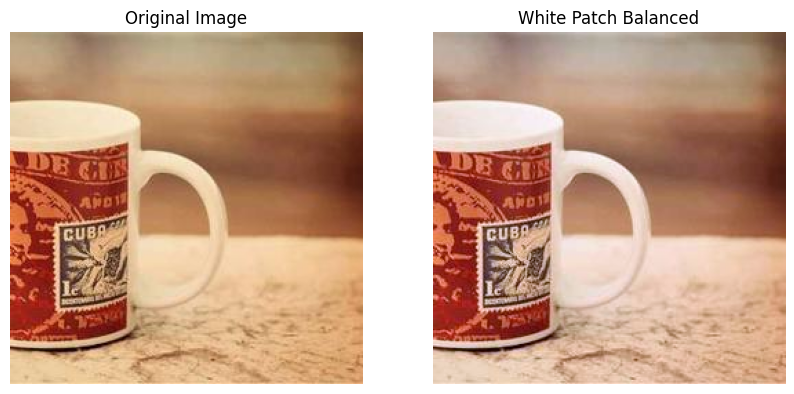

In [27]:
def white_patch_balance(img_rgb):
    img_float = img_rgb.astype(np.float32)

    # Finding the brightest pixel value in each channel
    max_vals = np.max(img_float, axis=(0, 1))

    # Calculating the scaling factor
    # Factor = 255 / (max values)
    scale_factors = 255.0 / max_vals

    # Applying the scaling to the whole image
    balanced_img = img_float * scale_factors

    balanced_img = np.clip(balanced_img, 0, 255).astype(np.uint8)

    return balanced_img

# Applying the white patch balance and displaying the results

wb_img = white_patch_balance(img_rgb)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wb_img)
plt.title("White Patch Balanced")
plt.axis('off')

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

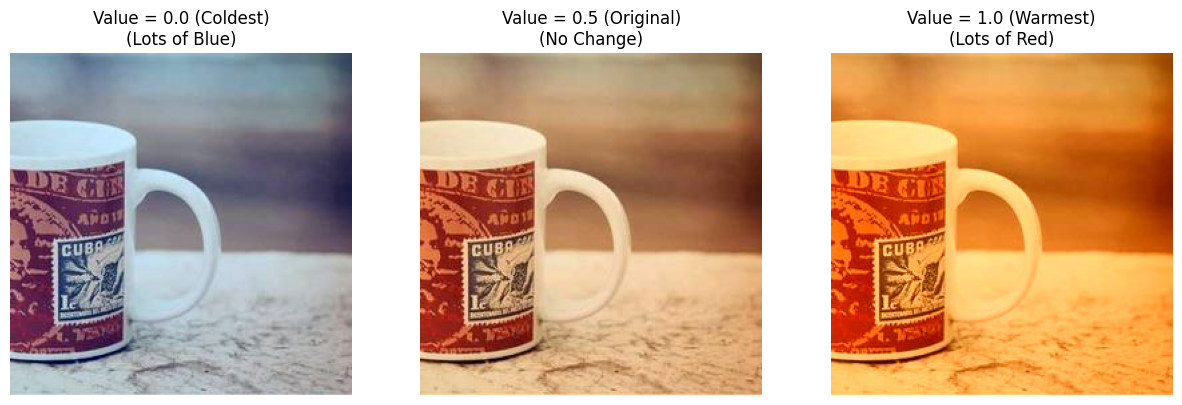

In [28]:
def white_balance(img_rgb, value):
    """
    Simple white balance slider
    Input:
      1) img_rgb: 0-255 RGB image
      2) value: Float between 0.0 and 1.0
    Logic behind the slider:
      - If value < 0.5: Add Blue, subtract Red (Image appears cold)
      - If value > 0.5: Add Red, subtract Blue (Image appears warm)
      - If value = 0.5: Return Original
    """
    img = img_rgb.astype(np.float32)

    # Mapping 0-1 value to -50-50 where:
    #   value = 0.0 -> -50 (Max Cold)
    #   value = 0.5 -> 0   (Neutral)
    #   value = 1.0 -> +50 (Max Warm)
    shift = (value - 0.5) * 100

    # Applying tthe shift
    if shift > 0:
        # Shift>0 means value >0.5 therefore we increase the red and decrease the blue
        img[:, :, 0] += shift  # Red channel shift
        img[:, :, 2] -= shift  # Blue channel shift
    else:
        # Shift<=0 means value <=0.5 therefore we increase the blue and decrease the red
        img[:, :, 0] += shift  # Red channel shift
        img[:, :, 2] -= shift  # Blue channel shift
    # Could have done the above thing witout if else because the same formula for
    # both the cases but this way looks neater imo

    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Coldest (Value = 0)
cold_img = white_balance(img_rgb, 0.0)

# Original (Value = 0.5)
orig_test = white_balance(img_rgb, 0.5)

# Warmest (Value = 1.0)
warm_img = white_balance(img_rgb, 1.0)

# Displaying the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cold_img)
plt.title("Value = 0.0 (Coldest)\n(Lots of Blue)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(orig_test)
plt.title("Value = 0.5 (Original)\n(No Change)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(warm_img)
plt.title("Value = 1.0 (Warmest)\n(Lots of Red)")
plt.axis('off')

plt.show()